- You've been assigned to repel an alien attack.  The alien attack contains:
    - 3 Arachnoid Abominations
    - 2 Chitinous Crawlers
    - 7 Swarming Scarabs
    - 3 Towering Tyrants
    - 1 Voracious Venompede
- You need to select a squad of soldiers to bring with you.  You may bring up to 10 soldiers, with any combination of the following weapons:
    - Antimatter Artillery
    - Fusion Flamethrower 
    - Gluon Grenades
    - Laser Lance
    - Macross Minigun
    - Pulse Phaser
    - Rail Rifle
    - Thermo-Torpedos
- So you could bring 10 soldiers all with Antimatter Artillery.  Or you could bring 1 with a Fusion Flamethrower, 1 with Gluon Grenades, and leave the other 8 spots blank.
- You are one of these soldiers - you've been through basic training, and are mechanically identical to the other soldiers.
- You have two objectives:
- Survive (thanks to modern medical technology, this will be reliably accomplished if the battle is a win, and reliably not accomplished if the battle is a loss).
- Impress your superiors by bringing as few soldiers with you as possible.
- The leaderboard will track how well you've done relative to random/best play at the # of soldiers you chose to bring.  You'll have to decide how important your standing/reduced risk of appearing like a coward to your superiors is, relative to your chance-of-being-eaten-tomorrow.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
data = pd.read_csv('./dndsci_long_war_data.csv')
shortnames = {
"Arachnoid Abomination": "Arachnoid",
"Chitinous Crawler": "Chitinous",
"Swarming Scarab": "Swarming",
"Towering Tyrant": "Towering",
"Voracious Venompede": "Voracious",
"Antimatter Artillery": "Antimatter",
"Fusion Flamethrower": "Fusion",
"Gluon Grenades": "Gluon",
"Laser Lance": "Laser",
"Macross Minigun": "Macross",
"Pulse Phaser": "Pulse",
"Rail Rifle": "Rail",
"Thermo-Torpedos": "Thermo"
}
data.rename(columns=shortnames, inplace=True)
data.rename(columns={"Glorious Victory for Freedom and Democracy?":"victory"}, inplace=True)
aliens = [
"Arachnoid",
"Chitinous",
"Swarming",
"Towering",
"Voracious"
]
weapons = [
"Antimatter",
"Fusion",
"Gluon",
"Laser",
"Macross",
"Pulse",
"Rail",
"Thermo"
]

display(data)
data.describe()

,Arachnoid,Chitinous,Swarming,Towering,Voracious,Antimatter,Fusion,Gluon,Laser,Macross,Pulse,Rail,Thermo,Soldiers,victory
0,1,3,0,0,0,1,0,0,0,1,0,0,0,2,Yes
1,2,4,7,0,0,0,0,0,0,0,2,1,2,5,Yes
2,0,0,0,0,4,1,0,0,0,0,0,1,0,2,Yes
3,1,4,0,0,0,0,0,2,0,0,0,0,1,3,Yes
4,1,0,7,0,0,0,0,0,1,1,1,0,0,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164350,2,0,7,2,3,1,1,0,0,3,0,2,0,7,Yes
164351,3,3,0,2,3,0,2,1,1,1,0,1,0,6,No
164352,1,0,0,0,0,0,0,0,1,0,0,0,0,1,Yes
164353,2,3,6,2,0,0,1,0,0,1,1,1,1,5,No


,Arachnoid,Chitinous,Swarming,Towering,Voracious,Antimatter,Fusion,Gluon,Laser,Macross,Pulse,Rail,Thermo,Soldiers
count,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000
mean,1.383974,2.140306,3.490700,1.098433,1.742356,0.535858,0.533193,0.531435,0.534161,0.534654,0.534489,0.535980,0.535871,4.275641
std,1.228176,1.922935,3.138992,0.960858,1.551970,0.682573,0.679330,0.679647,0.682499,0.684486,0.682064,0.683902,0.682661,1.896101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,2.000000,4.000000,6.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
max,3.000000,5.000000,9.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,17.000000


In [66]:
engagement = {
"Arachnoid":3,
"Chitinous":2,
"Swarming":7,
"Towering":3,
"Voracious":1
}
query = ' and '.join([f"{k} <= {v+1} and {k} >= {v-1}" for k, v in engagement.items()])
query += "and Voracious == 1"
similar = data.query(query)
display(similar)
display(similar.groupby("victory")["victory"].count())
display(similar.describe())

,Arachnoid,Chitinous,Swarming,Towering,Voracious,Antimatter,Fusion,Gluon,Laser,Macross,Pulse,Rail,Thermo,Soldiers,victory
1180,2,2,7,2,1,1,0,0,0,3,1,1,0,6,No
1868,2,3,6,2,1,1,0,0,5,3,3,0,1,13,Yes
4675,3,2,8,2,1,0,1,1,2,3,1,1,1,10,Yes
5330,2,3,8,2,1,2,0,0,1,2,1,2,2,10,Yes
5986,2,3,6,2,1,2,0,1,0,0,2,0,0,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163010,3,2,8,3,1,0,3,1,1,0,0,1,0,6,No
163622,2,3,6,2,1,2,0,0,1,1,1,1,0,6,Yes
164027,3,3,7,2,1,0,0,2,2,0,1,0,1,6,Yes
164106,2,2,8,2,1,0,0,0,2,0,2,0,1,5,Yes


victory
No      81
Yes    122
Name: victory, dtype: int64

,Arachnoid,Chitinous,Swarming,Towering,Voracious,Antimatter,Fusion,Gluon,Laser,Macross,Pulse,Rail,Thermo,Soldiers
count,203.000000,203.000000,203.000000,203.000000,203.0,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,2.458128,2.546798,7.123153,2.064039,1.0,0.748768,0.778325,0.733990,0.724138,0.827586,0.773399,0.773399,0.837438,6.197044
std,0.499475,0.614613,0.789539,0.245428,0.0,0.758409,0.811503,0.723151,0.803925,0.852967,0.800916,0.800916,0.825448,1.551298
min,2.000000,1.000000,6.000000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,2.000000,2.000000,6.000000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2.000000,3.000000,7.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
75%,3.000000,3.000000,8.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,3.000000,3.000000,8.000000,3.000000,1.0,3.000000,4.000000,3.000000,5.000000,5.000000,3.000000,4.000000,4.000000,13.000000


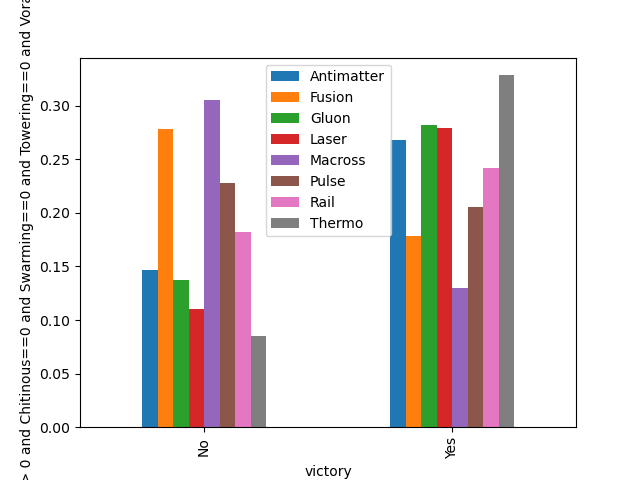

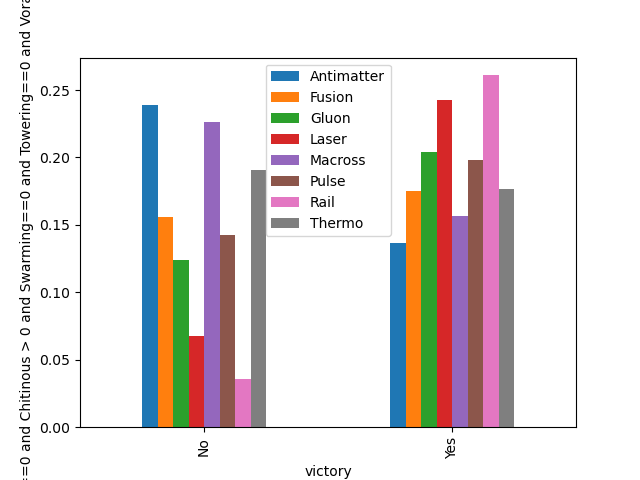

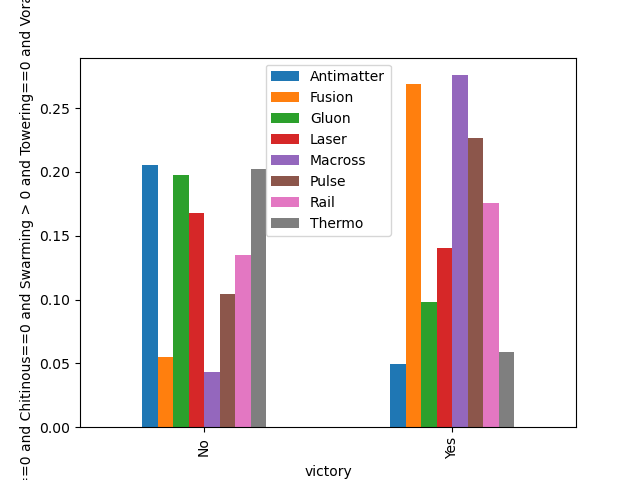

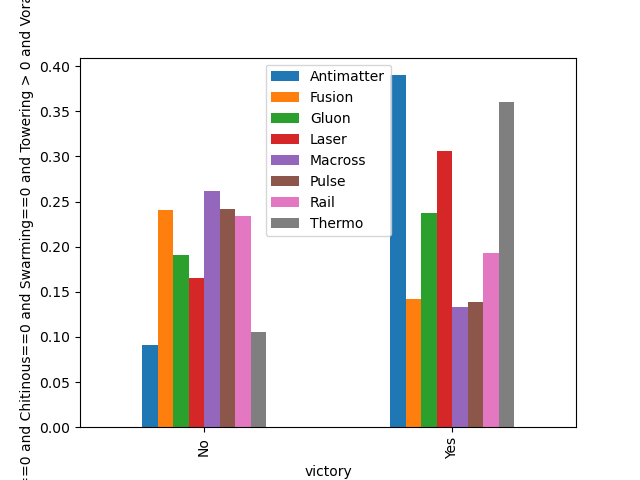

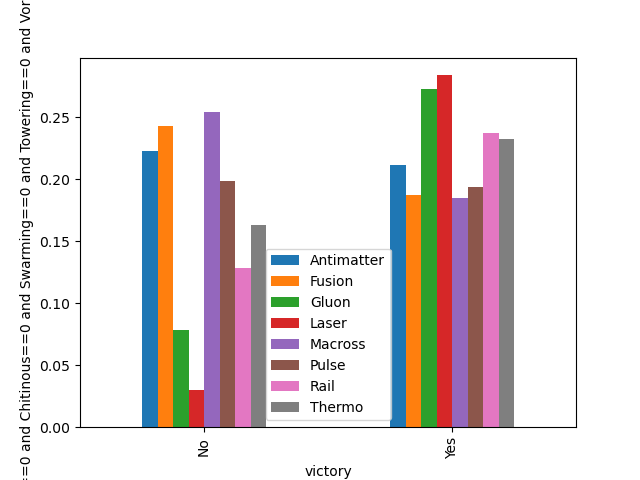

In [81]:
single_alien_queries = [" and ".join(f"{t} > 0" if t==al else f"{t}==0"  for t in aliens) for al in aliens]
for q in single_alien_queries:
    data.query(q).drop(aliens+["Soldiers"], axis=1).groupby("victory").mean().plot.bar(ylabel=q)

Observations:  
Arachnoid - thermo very good, laser and gluon okay, macross bad  
Chitinous - Rail very good, laser okay, antimatter meh  
Swarming - fusion and macross very good, pulse okay, others meh  
Towering - antimetter and thermo very good, others eh  
Voracious - gluon and laser very good, rail okay  

In [ ]:
missing_weapon_queries = [" and ".join(f"{t} > 0" if t!=al else f"{t}==0"  for t in weapons) for al in weapons]
for q in missing_weapon_queries:
    data.query(q+"and Soldiers >= 0").drop(weapons+["Soldiers"], axis=1).groupby("victory").mean().plot.bar(ylabel=q)

In [ ]:
single_weapon_queries = [" and ".join(f"{t} > 0" if t==al else f"{t}==0"  for t in weapons) for al in weapons]
for q in single_weapon_queries:
    data.query(q+"and Soldiers >= 0").drop(weapons+["Soldiers"], axis=1).groupby("victory").mean().plot.bar(ylabel=q)

Observation:  
Pulse is pretty shitty eh?

In [ ]:
display(similar.query("Soldiers == 5").drop("Soldiers", axis=1).groupby("victory").describe())
display(similar.query("Soldiers == 5").groupby("victory").mean())

In [156]:
# What's the average amount of a specific alien a single soldier with a weapon can kill? (note: disfavors aoe i.e. if Thermo just damages everyone)
wwq = list(zip(weapons, single_weapon_queries))
aaq = list(zip(aliens, single_alien_queries))
from IPython.display import display_html 
for (w, wq) in wwq:
    display_html(f'<h2>{w}</h2>', raw=True)
    tab = []
    for (a, aq) in aaq:
        tab.append(data.query(wq+" and "+aq).sort_values("victory").groupby([a,"victory"]).count()[["Soldiers"]])
    tab_styled = [
        t.style.set_table_attributes("style='display:inline'") for t in tab
    ]
    display_html("".join(t._repr_html_() for t in tab_styled), raw=True)

Antimatter

Soldiers 
 
 
 Arachnoid 
 victory 
   
 
 
 
 
 1 
 Yes 
 51 
 
 
 2 
 No 
 36 
 
 
 Yes 
 37 
 
 
 3 
 No 
 10 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Chitinous 
 victory 
   
 
 
 
 
 1 
 Yes 
 13 
 
 
 2 
 No 
 23 
 
 
 Yes 
 24 
 
 
 3 
 No 
 74 
 
 
 4 
 No 
 54 
 
 
 5 
 No 
 11 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Swarming 
 victory 
   
 
 
 
 
 1 
 Yes 
 8 
 
 
 2 
 No 
 12 
 
 
 Yes 
 5 
 
 
 3 
 No 
 35 
 
 
 4 
 No 
 40 
 
 
 5 
 No 
 44 
 
 
 6 
 No 
 54 
 
 
 7 
 No 
 32 
 
 
 8 
 No 
 21 
 
 
 9 
 No 
 1 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Towering 
 victory 
   
 
 
 
 
 1 
 Yes 
 78 
 
 
 2 
 No 
 27 
 
 
 Yes 
 28 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Voracious 
 victory 
   
 
 
 
 
 1 
 Yes 
 23 
 
 
 2 
 No 
 32 
 
 
 Yes 
 36 
 
 
 3 
 No 
 54 
 
 
 4 
 No 
 2

Fusion

Soldiers 
 
 
 Arachnoid 
 victory 
   
 
 
 
 
 1 
 No 
 34 
 
 
 Yes 
 23 
 
 
 2 
 No 
 78 
 
 
 3 
 No 
 14 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Chitinous 
 victory 
   
 
 
 
 
 1 
 Yes 
 19 
 
 
 2 
 No 
 13 
 
 
 Yes 
 34 
 
 
 3 
 No 
 33 
 
 
 Yes 
 25 
 
 
 4 
 No 
 39 
 
 
 Yes 
 5 
 
 
 5 
 No 
 20 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Swarming 
 victory 
   
 
 
 
 
 1 
 Yes 
 5 
 
 
 2 
 Yes 
 17 
 
 
 3 
 Yes 
 28 
 
 
 4 
 No 
 5 
 
 
 Yes 
 35 
 
 
 5 
 No 
 14 
 
 
 Yes 
 36 
 
 
 6 
 No 
 18 
 
 
 Yes 
 37 
 
 
 7 
 No 
 15 
 
 
 Yes 
 34 
 
 
 8 
 No 
 16 
 
 
 Yes 
 12 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Towering 
 victory 
   
 
 
 
 
 1 
 No 
 72 
 
 
 2 
 No 
 51 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Voracious 
 victory 
   
 
 
 
 
 1 
 No 
 3 
 
 
 Yes 
 20 
 
 
 2 
 No 
 51 
 
 
 Yes 
 22 
 
 
 3 
 No 
 45 
 
 
 4 
 No 
 6

Gluon

Soldiers 
 
 
 Arachnoid 
 victory 
   
 
 
 
 
 1 
 Yes 
 55 
 
 
 2 
 No 
 76 
 
 
 3 
 No 
 9 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Chitinous 
 victory 
   
 
 
 
 
 1 
 Yes 
 16 
 
 
 2 
 Yes 
 52 
 
 
 3 
 No 
 25 
 
 
 Yes 
 37 
 
 
 4 
 No 
 41 
 
 
 5 
 No 
 19 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Swarming 
 victory 
   
 
 
 
 
 1 
 Yes 
 6 
 
 
 2 
 Yes 
 15 
 
 
 3 
 No 
 10 
 
 
 Yes 
 20 
 
 
 4 
 No 
 39 
 
 
 5 
 No 
 52 
 
 
 6 
 No 
 63 
 
 
 7 
 No 
 50 
 
 
 8 
 No 
 30 
 
 
 9 
 No 
 2 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Towering 
 victory 
   
 
 
 
 
 1 
 No 
 35 
 
 
 Yes 
 40 
 
 
 2 
 No 
 53 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Voracious 
 victory 
   
 
 
 
 
 1 
 Yes 
 23 
 
 
 2 
 Yes 
 65 
 
 
 3 
 No 
 31 
 
 
 Yes 
 22 
 
 
 4 
 No 
 10

Laser

Soldiers 
 
 
 Arachnoid 
 victory 
   
 
 
 
 
 1 
 Yes 
 53 
 
 
 2 
 No 
 33 
 
 
 Yes 
 36 
 
 
 3 
 No 
 7 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Chitinous 
 victory 
   
 
 
 
 
 1 
 Yes 
 16 
 
 
 2 
 Yes 
 43 
 
 
 3 
 No 
 13 
 
 
 Yes 
 55 
 
 
 4 
 No 
 27 
 
 
 Yes 
 27 
 
 
 5 
 No 
 8 
 
 
 Yes 
 3 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Swarming 
 victory 
   
 
 
 
 
 1 
 Yes 
 6 
 
 
 2 
 Yes 
 12 
 
 
 3 
 No 
 12 
 
 
 Yes 
 24 
 
 
 4 
 No 
 27 
 
 
 Yes 
 20 
 
 
 5 
 No 
 42 
 
 
 Yes 
 16 
 
 
 6 
 No 
 51 
 
 
 7 
 No 
 54 
 
 
 8 
 No 
 23 
 
 
 9 
 No 
 5 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Towering 
 victory 
   
 
 
 
 
 1 
 No 
 20 
 
 
 Yes 
 61 
 
 
 2 
 No 
 51 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Voracious 
 victory 
   
 
 
 
 
 1 
 Yes 
 27 
 
 
 2 
 Yes 
 65 
 
 
 3 
 No 
 9 
 
 
 Yes 
 28 
 
 
 4 
 No 
 6 
 
 
 Yes 
 1

Macross

Soldiers 
 
 
 Arachnoid 
 victory 
   
 
 
 
 
 1 
 No 
 42 
 
 
 2 
 No 
 71 
 
 
 3 
 No 
 15 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Chitinous 
 victory 
   
 
 
 
 
 1 
 Yes 
 15 
 
 
 2 
 No 
 14 
 
 
 Yes 
 40 
 
 
 3 
 No 
 82 
 
 
 4 
 No 
 61 
 
 
 5 
 No 
 18 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Swarming 
 victory 
   
 
 
 
 
 1 
 Yes 
 3 
 
 
 2 
 Yes 
 13 
 
 
 3 
 Yes 
 21 
 
 
 4 
 Yes 
 36 
 
 
 5 
 Yes 
 49 
 
 
 6 
 No 
 15 
 
 
 Yes 
 32 
 
 
 7 
 No 
 22 
 
 
 Yes 
 27 
 
 
 8 
 No 
 18 
 
 
 Yes 
 7 
 
 
 9 
 No 
 2 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Towering 
 victory 
   
 
 
 
 
 1 
 No 
 81 
 
 
 2 
 No 
 56 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Voracious 
 victory 
   
 
 
 
 
 1 
 Yes 
 27 
 
 
 2 
 No 
 77 
 
 
 3 
 No 
 41 
 
 
 4 
 No 
 2

Pulse

Soldiers 
 
 
 Arachnoid 
 victory 
   
 
 
 
 
 1 
 No 
 16 
 
 
 Yes 
 34 
 
 
 2 
 No 
 85 
 
 
 3 
 No 
 14 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Chitinous 
 victory 
   
 
 
 
 
 1 
 Yes 
 11 
 
 
 2 
 Yes 
 50 
 
 
 3 
 No 
 39 
 
 
 Yes 
 30 
 
 
 4 
 No 
 63 
 
 
 5 
 No 
 7 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Swarming 
 victory 
   
 
 
 
 
 1 
 Yes 
 10 
 
 
 2 
 Yes 
 23 
 
 
 3 
 Yes 
 24 
 
 
 4 
 Yes 
 43 
 
 
 5 
 No 
 13 
 
 
 Yes 
 39 
 
 
 6 
 No 
 38 
 
 
 Yes 
 23 
 
 
 7 
 No 
 54 
 
 
 8 
 No 
 25 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Towering 
 victory 
   
 
 
 
 
 1 
 No 
 76 
 
 
 2 
 No 
 43 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Voracious 
 victory 
   
 
 
 
 
 1 
 Yes 
 29 
 
 
 2 
 No 
 36 
 
 
 Yes 
 20 
 
 
 3 
 No 
 40 
 
 
 4 
 No 
 7

Rail

,,Soldiers
Arachnoid,victory,
1,Yes,53
2,No,77
3,No,13
,,Soldiers
Chitinous,victory,
1,Yes,12
2,Yes,45
3,Yes,78
4,No,24


Thermo

Soldiers 
 
 
 Arachnoid 
 victory 
   
 
 
 
 
 1 
 Yes 
 61 
 
 
 2 
 No 
 16 
 
 
 Yes 
 51 
 
 
 3 
 No 
 3 
 
 
 Yes 
 2 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Chitinous 
 victory 
   
 
 
 
 
 1 
 Yes 
 18 
 
 
 2 
 No 
 17 
 
 
 Yes 
 36 
 
 
 3 
 No 
 40 
 
 
 Yes 
 29 
 
 
 4 
 No 
 53 
 
 
 5 
 No 
 12 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Swarming 
 victory 
   
 
 
 
 
 1 
 Yes 
 5 
 
 
 2 
 No 
 7 
 
 
 Yes 
 11 
 
 
 3 
 No 
 24 
 
 
 Yes 
 8 
 
 
 4 
 No 
 37 
 
 
 5 
 No 
 50 
 
 
 6 
 No 
 47 
 
 
 7 
 No 
 44 
 
 
 8 
 No 
 20 
 
 
 9 
 No 
 3 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Towering 
 victory 
   
 
 
 
 
 1 
 No 
 24 
 
 
 Yes 
 57 
 
 
 2 
 No 
 51 
 
 
 

 
 
 
   
   
 Soldiers 
 
 
 Voracious 
 victory 
   
 
 
 
 
 1 
 Yes 
 18 
 
 
 2 
 No 
 32 
 
 
 Yes 
 39 
 
 
 3 
 No 
 27 
 
 
 Yes 
 14 
 
 
 4 
 No 
 5